In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("renttherunway.csv")
print(df.head())

   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [4]:
print(df.head())
print("Shape of the data:", df.shape)
print(df.info())

   Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category 

In [5]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate records:", num_duplicates)
df = df.drop_duplicates()

Number of duplicate records: 0


In [6]:
columns_to_drop = ['user_id', 'item_id', 'review_text']
df = df.drop(columns=columns_to_drop)

In [7]:
has_string_data = df['weight'].str.contains('lbs').any()
if has_string_data:   
    df['weight'] = df['weight'].str.replace('lbs', '').astype(float)
print(df['weight'].head())

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64


In [8]:
unique_categories = df['rented for'].unique()
print("Unique categories in 'rented for' column:")
print(unique_categories)
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')
updated_categories = df['rented for'].unique()
print("\nUpdated categories in 'rented for' column:")
print(updated_categories)
print(df.head())

Unique categories in 'rented for' column:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']

Updated categories in 'rented for' column:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan]
   Unnamed: 0  fit bust size  weight  rating     rented for  \
0           0  fit       34d   137.0    10.0       vacation   
1           1  fit       34b   132.0    10.0          other   
2           2  fit       NaN     NaN    10.0          party   
3           3  fit       34c   135.0     8.0  formal affair   
4           4  fit       34b   145.0    10.0        wedding   

           body type                                     review_summary  \
0          hourglass                               So many compliments!   
1  straight & narrow                            I felt so glamourous!!!   
2                NaN  It was a great time to celebrate the (almost) ...   
3               pear   Dress arrived on time an

In [8]:
import re
import numpy as np
def convert_feet_to_inches(height):
    if isinstance(height, str):
        feet_match = re.search(r"(\d+)'", height)
        inches_match = re.search(r"(\d+)\"", height)
        
        feet = int(feet_match.group(1)) if feet_match else 0
        inches = int(inches_match.group(1)) if inches_match else 0
    elif isinstance(height, float) and np.isnan(height):
        feet = 0
        inches = 0
    else:
        feet = int(height)
        inches = 0
    
    total_inches = (feet * 12) + inches
    return total_inches
df['height'] = df['height'].apply(convert_feet_to_inches)
print(df['height'].head())
df['height'] = df['height'].astype(float)
print(df['height'].head())

0    68
1    66
2    64
3    65
4    69
Name: height, dtype: int64
0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64


In [10]:
missing_values = df.isnull().sum()
print("missing values:\n",missing_values)
df_filled = df.fillna(df.mean())
print("treated",df_filled.head())


missing values:
 Unnamed: 0            0
fit                   0
bust size         18411
weight            29982
rating               82
rented for           10
body type         14637
review_summary      345
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64
treated    Unnamed: 0  fit bust size      weight  rating     rented for  \
0           0  fit       34d  137.000000    10.0       vacation   
1           1  fit       34b  132.000000    10.0          other   
2           2  fit       NaN  137.391709    10.0          party   
3           3  fit       34c  135.000000     8.0  formal affair   
4           4  fit       34b  145.000000    10.0        wedding   

           body type                                     review_summary  \
0          hourglass                               So many compliments!   
1  straight & narrow                            I felt so glamourous!!!   
2                NaN  

In [11]:
# Statistical summary for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_summary = numerical_columns.describe()
print("numerical summary\n",numerical_summary)

# Statistical summary for categorical columns
categorical_columns = df.select_dtypes(include=['object'])
categorical_summary = categorical_columns.describe()
print("categorical summary\n",categorical_summary)

numerical summary
           Unnamed: 0         weight         rating           size  \
count  192544.000000  162562.000000  192462.000000  192544.000000   
mean    96271.500000     137.391709       9.092371      12.245175   
std     55582.809453      21.899967       1.430044       8.494877   
min         0.000000      50.000000       2.000000       0.000000   
25%     48135.750000     123.000000       8.000000       8.000000   
50%     96271.500000     135.000000      10.000000      12.000000   
75%    144407.250000     148.000000      10.000000      16.000000   
max    192543.000000     300.000000      10.000000      58.000000   

                 age  
count  191584.000000  
mean       33.871017  
std         8.058083  
min         0.000000  
25%        29.000000  
50%        32.000000  
75%        37.000000  
max       117.000000  
categorical summary
            fit bust size rented for  body type  review_summary category  \
count   192544    174133     192534     177907          

In [12]:
import numpy as np
z_scores = (df['age'] - df['age'].mean()) / df['age'].std()
threshold = 3
outliers = df[np.abs(z_scores) > threshold]
if outliers.empty:
    print("No outliers found in the 'age' column.")
else:
    print("Outliers found in the 'age' column:")
    print(outliers)

Outliers found in the 'age' column:
        Unnamed: 0    fit bust size  weight  rating     rented for  body type  \
2                2    fit       NaN     NaN    10.0          party        NaN   
7                7    fit      34d+   118.0    10.0  formal affair  full bust   
121            121    fit       36b   135.0    10.0          other       pear   
187            187    fit       NaN   180.0     6.0  formal affair  full bust   
204            204    fit       36d   200.0     6.0        wedding  hourglass   
...            ...    ...       ...     ...     ...            ...        ...   
192222      192222    fit       34c     NaN    10.0        wedding  hourglass   
192224      192224    fit       36c   132.0     8.0          party  hourglass   
192293      192293  large       36d   145.0     8.0          other  full bust   
192363      192363    fit       32d   125.0    10.0          party  hourglass   
192407      192407    fit       36a   135.0    10.0           work       

In [13]:
median_age = df['age'].median()
df.loc[np.abs(z_scores) > threshold, 'age'] = median_age

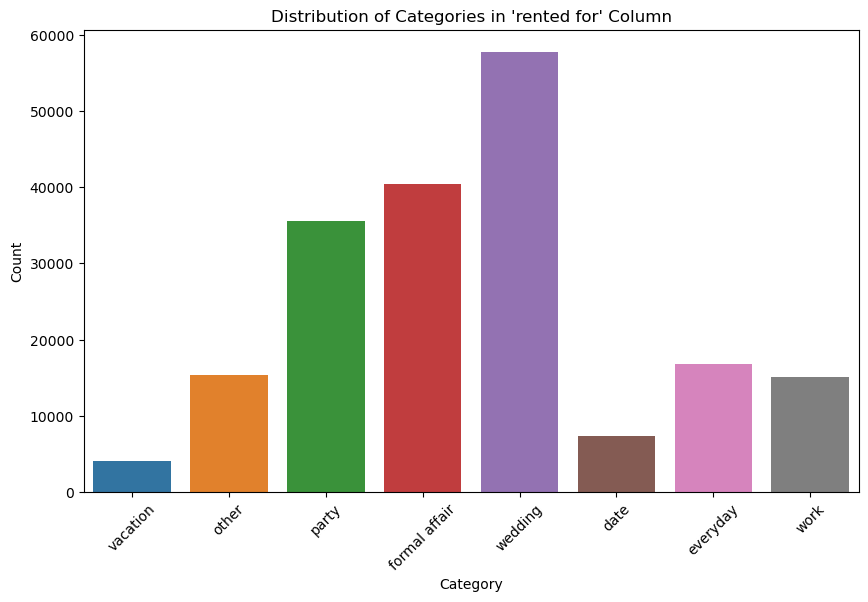

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
category_counts = df['rented for'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rented for')
plt.title("Distribution of Categories in 'rented for' Column")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [19]:
label_encoder = LabelEncoder()
df['body type'] = label_encoder.fit_transform(df['body type'])
df['rented for'] = label_encoder.fit_transform(df['rented for'])
df['category'] = label_encoder.fit_transform(df['category'])
df['fit'] = label_encoder.fit_transform(df['fit'])
df['bust size'] = label_encoder.fit_transform(df['bust size'])
df['review_summary'] = label_encoder.fit_transform(df['review_summary'])
df['height'] = label_encoder.fit_transform(df['height'])
df['review_date'] = label_encoder.fit_transform(df['review_date'])
print(df.head())

   Unnamed: 0  fit  bust size  weight  rating  rented for  body type  \
0           0    0         39   137.0    10.0           5          3   
1           1    0         37   132.0    10.0           3          6   
2           2    0        106     NaN    10.0           4          7   
3           3    0         38   135.0     8.0           2          4   
4           4    0         37   145.0    10.0           6          1   

   review_summary  category  height  size   age  review_date  
0          109622        44      16    14  28.0           77  
1           59681        20      14    12  36.0         1189  
2           74243        45      12     4  32.0          411  
3           28142        16      13     8  34.0          607  
4          140372        20      17    12  27.0         2205  


In [21]:
numerical_features = ['weight', 'age', 'size'] 
scaled_features = StandardScaler().fit_transform(df1[numerical_features].values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=numerical_features)
df_encoded = pd.concat([scaled_features_df, df1[['body type', 'rented for', 'category', 'fit', 'bust size', 'review_summary', 'height', 'review_date']]], axis=1)
print(df_encoded.head())

         weight        age      size          body type     rented for  \
0 -1.946601e-02  -0.730412  0.206575          hourglass       vacation   
1 -2.679414e-01   0.264866 -0.028862  straight & narrow          other   
2 -1.412419e-15  10.217655 -0.970608                NaN          party   
3 -1.188562e-01   0.016047 -0.499735               pear  formal affair   
4  3.780946e-01  -0.854822 -0.028862           athletic        wedding   

  category  fit bust size                                     review_summary  \
0   romper  fit       34d                               So many compliments!   
1     gown  fit       34b                            I felt so glamourous!!!   
2   sheath  fit       NaN  It was a great time to celebrate the (almost) ...   
3    dress  fit       34c   Dress arrived on time and in perfect condition.    
4     gown  fit       34b                    Was in love with this dress !!!   

  height         review_date  
0  5' 8"      April 20, 2016  
1  5' 6"    

In [25]:
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[1.00000519 0.06128711 0.73274055]
 [0.06128711 1.00000519 0.15525473]
 [0.73274055 0.15525473 1.00000519]]


In [26]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-0.68697711 -0.69737313  0.20428698]
 [-0.197342   -0.09152275 -0.97605313]
 [-0.69937014  0.71084056  0.07474698]]


Eigen values: 
 [1.76356977 0.26115749 0.97528832]


In [27]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [58.7853536836564, 32.50944188365801, 8.70520443268559]
Cummulative Variance Explained:  [ 58.78535368  91.29479557 100.        ]


In [30]:
pca=PCA(n_components = 3)
pca.fit(scaled_features_df)

PCA(n_components=3)

In [32]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-0.013041,-0.724386,0.227266
1,-0.151985,0.315418,0.142098
2,1.337558,10.045524,-1.625096
3,-0.427984,0.077297,-0.273813
4,0.070865,-0.909434,-0.205953


In [39]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,577632.000000
1,2,374874.280829
2,3,283031.296383
3,4,223432.831960
4,5,197475.585940
5,6,175698.530440
6,7,159750.258090
7,8,145896.130215
8,9,132912.752106
9,10,122752.870275


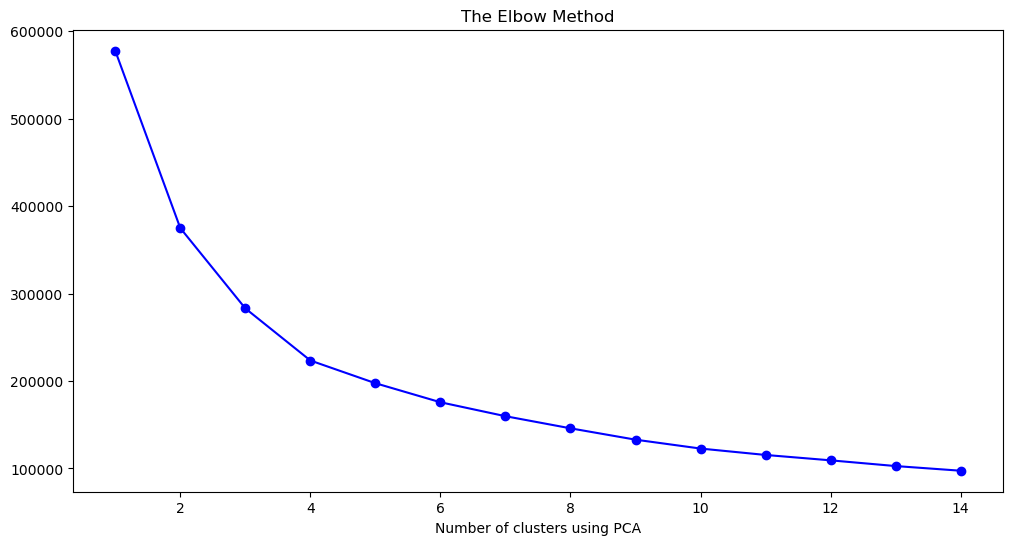

In [40]:
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, n_init=15, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=4, n_init=15, random_state=100)

In [42]:
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [43]:
kmeans_df = data_pca.join(label)
kmeans_df.head()

,PC1,PC2,PC3,Label
0,-0.013041,-0.724386,0.227266,0
1,-0.151985,0.315418,0.142098,0
2,1.337558,10.045524,-1.625096,3
3,-0.427984,0.077297,-0.273813,1
4,0.070865,-0.909434,-0.205953,0


In [49]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
silhouette_avg = silhouette_score(data_pca, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.330849086284665


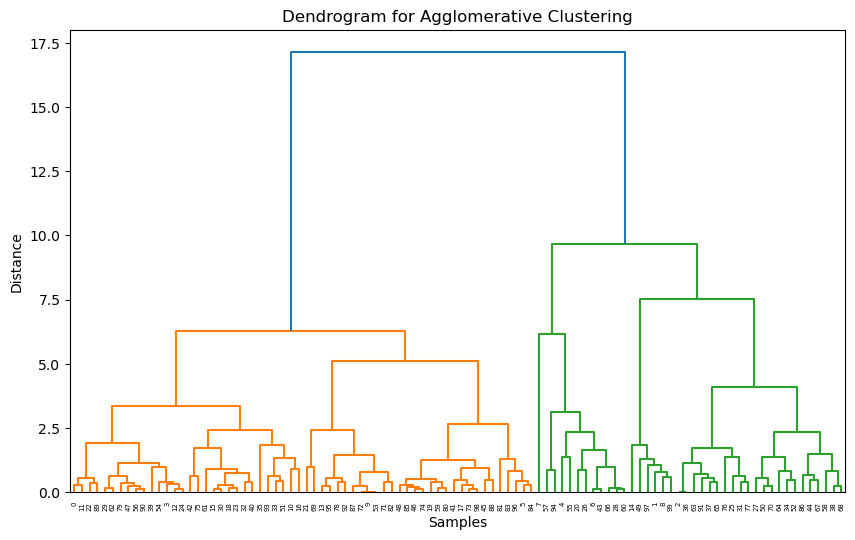

In [50]:
import random
from scipy.cluster.hierarchy import dendrogram, linkage
sample_size = 100  
random_indices = random.sample(range(len(scaled_features)), sample_size)
sampled_data = scaled_features[random_indices]
linkage_matrix = linkage(sampled_data, method='ward')
plt.figure(figsize=[10, 6])
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

In [51]:
optimal_k = 4  
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
agglomerative.fit(sampled_data) 

AgglomerativeClustering(n_clusters=4)

In [52]:
labels = agglomerative.labels_
silhouette_avg = silhouette_score(sampled_data, labels)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.36501483447066235
